# imports

In [1]:
# system & general:
from os import listdir, mkdir, makedirs
from os.path import isfile, join, isdir, exists
import cPickle as pickle
import os
import re
import time

# data analysis and statistics:
import pandas as pd
import numpy as np
from scipy import stats
import random
from scipy.stats import pearsonr, fisher_exact, mannwhitneyu, sem
import math
from scipy.spatial.distance import braycurtis, pdist, euclidean

# figures:
import matplotlib as mpl
# mpl.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns 
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
# from PNPChip.ForPaper.Figures.nature_guidline_utils import m2inch
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# my functions:
from ShaniBA.myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot, adjusted_roundup
from ShaniBA.MyFunctionsShani import *
from ShaniBA.GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from ShaniBA.TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from ShaniBA.SampleLists.SampleFileFunctions import *
from ShaniBA.PhenotypicData.PhenotypeGenerationFunctions import *
from ShaniBA.CardioProject.CardioFunctions import *
from ShaniBA.PredictionPipeline.PredictionFunctions import *
from ShaniBA.TCR_feature_generation.SubsamplingFunctions import *
from ShaniBA.TCR_feature_generation.SequenceClusteringModule import *
from ShaniBA.CardioProject.Figures.GeneralFigureFunctions import *
from ShaniBA.CardioProject.Figures.Figure1 import *

#ML:
from sklearn.linear_model import LogisticRegression, LinearRegression


stop
done1
stop
done
done
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Definitions

In [2]:
#####path definitions:
MyPath = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/PNP530', 'rb') as fp:
    PNP530 = pickle.load(fp)
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126', 'rb') as fp:
    Cardio126 = pickle.load(fp)
PNP530Cardio126 = PNP530 + Cardio126

FIG5_DIR = '/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Presentations and Manuscripts/CardioTCR paper/FigureDraft_Jan19/\
Fig5_drugs/'
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
FEATURES_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/Predictions/featureDFs/'
SAMPLE_LIST_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/'
CARDIO_PHEN_DIR='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/'
CLUSTER_ANALYSIS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/seqClusters_allProd_maxdist1/'

##### general definitions:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)
np.set_printoptions(precision=4, linewidth=200)

cdate = str(time.strftime("%d%m%Y"))
cdate

'30032019'

In [3]:
PRED_RESULTS_DIR

'/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'

# general functions:

the function remove_spines was copied to GenderalFigureFunctions.py

# general settings

## figure definitions

In [4]:
def set_fig5_definitions():
    params = {
   'axes.labelsize': 16,
   'font.size': 12,
   'legend.fontsize': 14,
    'axes.titlesize':16,
    'axes.titleweight':'bold',
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
#    'figure.figsize': [m2inch(183), m2inch(247)],#[4.5, 4.5]
#    'figure.dpi': 300,
   'xtick.direction':'out'}


    mpl.rcParams.update(params)
    mpl.rcParams['axes.linewidth'] = 0.5
    mpl.rcParams['axes.edgecolor'] = 'black'
    mpl.rcParams['axes.facecolor'] = 'white'
    mpl.rcParams['xtick.direction'] = 'out'
    mpl.rcParams['xtick.minor.pad'] = 4

    return

In [5]:
mpl.rcParams.keys()

[u'agg.path.chunksize',
 u'animation.avconv_args',
 u'animation.avconv_path',
 u'animation.bitrate',
 u'animation.codec',
 u'animation.convert_args',
 u'animation.convert_path',
 u'animation.ffmpeg_args',
 u'animation.ffmpeg_path',
 u'animation.frame_format',
 u'animation.html',
 u'animation.mencoder_args',
 u'animation.mencoder_path',
 u'animation.writer',
 u'axes.axisbelow',
 u'axes.edgecolor',
 u'axes.facecolor',
 u'axes.formatter.limits',
 u'axes.formatter.use_locale',
 u'axes.formatter.use_mathtext',
 u'axes.formatter.useoffset',
 u'axes.grid',
 u'axes.grid.axis',
 u'axes.grid.which',
 u'axes.hold',
 u'axes.labelcolor',
 u'axes.labelpad',
 u'axes.labelsize',
 u'axes.labelweight',
 u'axes.linewidth',
 u'axes.prop_cycle',
 u'axes.spines.bottom',
 u'axes.spines.left',
 u'axes.spines.right',
 u'axes.spines.top',
 u'axes.titlesize',
 u'axes.titleweight',
 u'axes.unicode_minus',
 u'axes.xmargin',
 u'axes.ymargin',
 u'axes3d.grid',
 u'backend',
 u'backend.qt4',
 u'backend.qt5',
 u'backend_fallback',
 u'boxplot.bootstrap',
 u'boxplot.boxprops.color',
 u'boxplot.boxprops.linestyle',
 u'boxplot.boxprops.linewidth',
 u'boxplot.capprops.color',
 u'boxplot.capprops.linestyle',
 u'boxplot.capprops.linewidth',
 u'boxplot.flierprops.color',
 u'boxplot.flierprops.linestyle',
 u'boxplot.flierprops.linewidth',
 u'boxplot.flierprops.marker',
 u'boxplot.flierprops.markeredgecolor',
 u'boxplot.flierprops.markerfacecolor',
 u'boxplot.flierprops.markersize',
 u'boxplot.meanline',
 u'boxplot.meanprops.color',
 u'boxplot.meanprops.linestyle',
 u'boxplot.meanprops.linewidth',
 u'boxplot.medianprops.color',
 u'boxplot.medianprops.linestyle',
 u'boxplot.medianprops.linewidth',
 u'boxplot.notch',
 u'boxplot.patchartist',
 u'boxplot.showbox',
 u'boxplot.showcaps',
 u'boxplot.showfliers',
 u'boxplot.showmeans',
 u'boxplot.vertical',
 u'boxplot.whiskerprops.color',
 u'boxplot.whiskerprops.linestyle',
 u'boxplot.whiskerprops.linewidth',
 u'boxplot.whiskers',
 u'contour.corner_mask',
 u'contour.negative_linestyle',
 u'datapath',
 u'docstring.hardcopy',
 u'errorbar.capsize',
 u'examples.directory',
 u'figure.autolayout',
 u'figure.dpi',
 u'figure.edgecolor',
 u'figure.facecolor',
 u'figure.figsize',
 u'figure.frameon',
 u'figure.max_open_warning',
 u'figure.subplot.bottom',
 u'figure.subplot.hspace',
 u'figure.subplot.left',
 u'figure.subplot.right',
 u'figure.subplot.top',
 u'figure.subplot.wspace',
 u'figure.titlesize',
 u'figure.titleweight',
 u'font.cursive',
 u'font.family',
 u'font.fantasy',
 u'font.monospace',
 u'font.sans-serif',
 u'font.serif',
 u'font.size',
 u'font.stretch',
 u'font.style',
 u'font.variant',
 u'font.weight',
 u'grid.alpha',
 u'grid.color',
 u'grid.linestyle',
 u'grid.linewidth',
 u'image.aspect',
 u'image.cmap',
 u'image.composite_image',
 u'image.interpolation',
 u'image.lut',
 u'image.origin',
 u'image.resample',
 u'interactive',
 u'keymap.all_axes',
 u'keymap.back',
 u'keymap.forward',
 u'keymap.fullscreen',
 u'keymap.grid',
 u'keymap.home',
 u'keymap.pan',
 u'keymap.quit',
 u'keymap.save',
 u'keymap.xscale',
 u'keymap.yscale',
 u'keymap.zoom',
 u'legend.borderaxespad',
 u'legend.borderpad',
 u'legend.columnspacing',
 u'legend.edgecolor',
 u'legend.facecolor',
 u'legend.fancybox',
 u'legend.fontsize',
 u'legend.framealpha',
 u'legend.frameon',
 u'legend.handleheight',
 u'legend.handlelength',
 u'legend.handletextpad',
 u'legend.isaxes',
 u'legend.labelspacing',
 u'legend.loc',
 u'legend.markerscale',
 u'legend.numpoints',
 u'legend.scatterpoints',
 u'legend.shadow',
 u'lines.antialiased',
 u'lines.color',
 u'lines.dash_capstyle',
 u'lines.dash_joinstyle',
 u'lines.linestyle',
 u'lines.linewidth',
 u'lines.marker',
 u'lines.markeredgewidth',
 u'lines.markersize',
 u'lines.solid_capstyle',
 u'lines.solid_joinstyle',
 u'markers.fillstyle',
 u'mathtext.bf',
 u'mathtext.cal',
 u'mathtext.default',
 u'mathtext.fallback_to_cm',
 u'mathtext.fontset',
 u'mathtext.it',
 u'mathtext.rm',
 u'mathtext.sf',
 u'mathtext.tt',
 u'nbagg.transpar

In [6]:
set_fig5_definitions()

## figure design

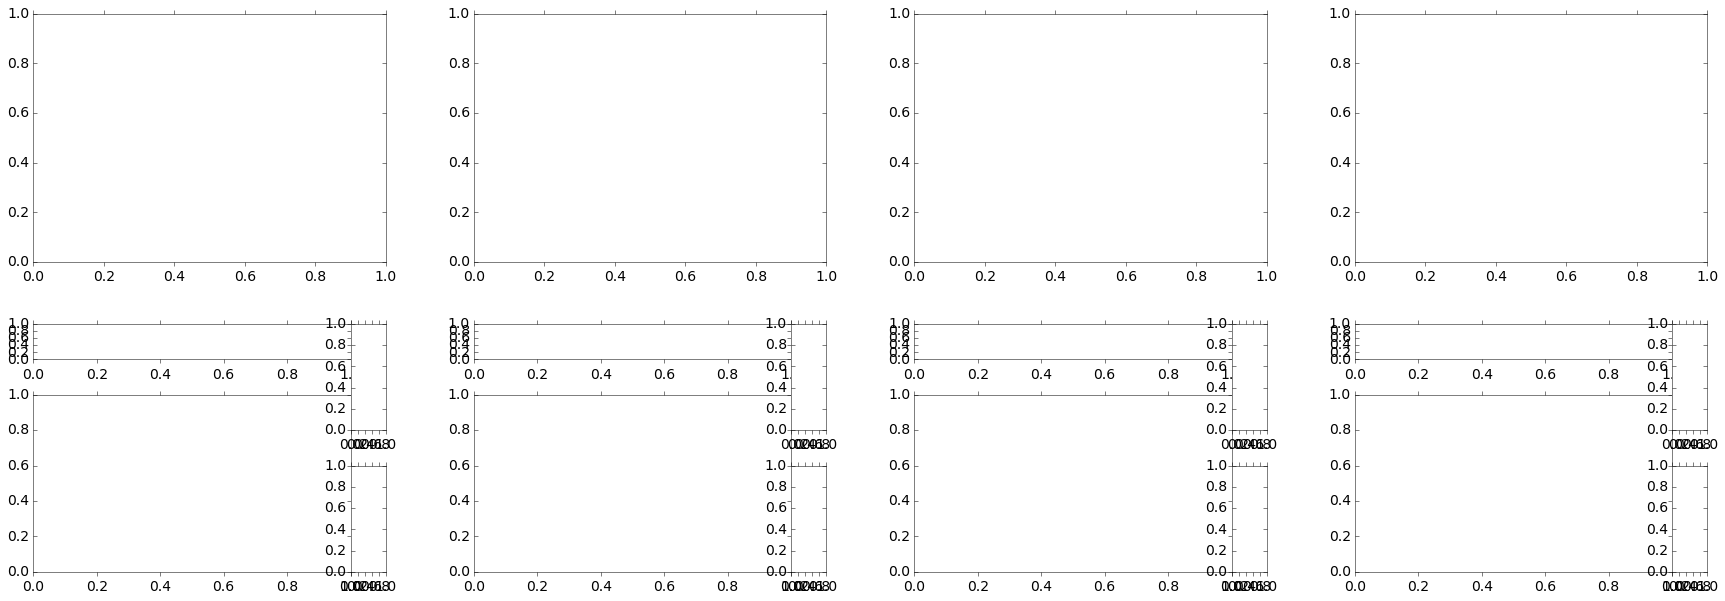

In [7]:
def divide_to_subplots_fig5b(gs):
    gs01 = gridspec.GridSpecFromSubplotSpec(14, 10, subplot_spec=gs,wspace=0, hspace=0)
    ax1=plt.Subplot(fig,gs01[:2,:9]) ## prediction heatmap
    fig.add_subplot(ax1)
    ax2=plt.Subplot(fig,gs01[4:14,:9]) ## clusters heatmap
    fig.add_subplot(ax2)
    ax3=plt.Subplot(fig,gs01[:6,9]) ## ## prediction colorbar
    fig.add_subplot(ax3)
    ax4=plt.Subplot(fig,gs01[8:,9]) ## ## cluster colorbar
    fig.add_subplot(ax4)
    
    return ax1,ax2,ax3,ax4
    
    



fig = plt.figure(figsize=(30, 10))
gs0 = gridspec.GridSpec(2, 4, wspace=0.25, hspace=0.25)

### A:
ax1 = plt.Subplot(fig, gs0[0, 0])
fig.add_subplot(ax1)

ax2 = plt.Subplot(fig, gs0[0, 1])
fig.add_subplot(ax2)

ax3 = plt.Subplot(fig, gs0[0, 2])
fig.add_subplot(ax3)

ax4 = plt.Subplot(fig, gs0[0, 3])
fig.add_subplot(ax4)

### B:
# ax5 = plt.Subplot(fig, gs0[1, 0])
# fig.add_subplot(ax5)
ax51,ax52,ax53,ax54=divide_to_subplots_fig5b(gs0[1, 0])

# ax6 = plt.Subplot(fig, gs0[1, 1])
# fig.add_subplot(ax6)
ax61,ax62,ax63,ax64=divide_to_subplots_fig5b(gs0[1, 1])

# ax7 = plt.Subplot(fig, gs0[1, 2])
# fig.add_subplot(ax7)
ax71,ax72,ax73,ax74=divide_to_subplots_fig5b(gs0[1, 2])


# ax8 = plt.Subplot(fig, gs0[1, 3])
# fig.add_subplot(ax8)
ax81,ax82,ax83,ax84=divide_to_subplots_fig5b(gs0[1, 3])


plt.show()

# plot functions

1. copy ROC+PR plotting function from fig1 and modify
2. copy shap plot from fig2 and modify

## fig 5a: roc+PR curve for clinical phenotype prediction:

first 3 columns: auc, last column-correlation

In [111]:
def plot_phen_prediction_ROC_PR(ax,phen,pred_dir,pVal):
    
    #get pred_proba data for phenotype
    dir2 = PRED_RESULTS_DIR + 'Cardio126_diseasePhenotypes/' + pred_dir
    phen_pred_proba = pd.read_pickle(dir2 + 'predictions_df.pkl').astype('float').rename(columns={phen:'pred_proba',
                                                                                                 phen.replace(' ',''):'pred_proba',
                                                                                        phen.replace('Acute','Acute '):'pred_proba'})
    print 'phen_pred_proba.columns:'
    print phen_pred_proba.columns
    phen_pred_proba=pd.DataFrame(phen_pred_proba['pred_proba'])
#     print phen_pred_proba.head()
    
    # get phenotype data
    phen_file = CARDIO_PHEN_DIR+phen.replace(' ','')+'.xlsx'
    phenDF = pd.read_excel(phen_file).set_index('BD').astype('float')

    merged = pd.merge(phenDF, phen_pred_proba, how='inner', left_index=True, right_index=True)
    print ('merged.shape before dropna ',merged.shape)
    merged=merged.dropna(how='any')
    print ('merged.shape after dropna ',merged.shape)
    

#     print 'merged'
#     print merged.head()
#     print merged[merged.isnull().any(axis=1)]

    # #plot:
    pos_label = 1
    ax, inset_axes,roc_auc, pr_auc, prevalence = plot_ROC_PR_AUC(y=pd.DataFrame(merged[phen.replace(' ','')]), y_pred_df=pd.DataFrame(merged['pred_proba']),
                                    ax=ax, color1='darkred', color2='grey', ticklabelsize=mpl.rcParams['xtick.labelsize'],
                                      textsize=mpl.rcParams['font.size'], labelsize=mpl.rcParams['axes.labelsize'], add_texts=False)
    ax.annotate('ROC AUC=%s\nObserved p=%s\nPR AUC=%s' % (round(roc_auc, 3), pVal, round(pr_auc, 2)), xy=(0.04, 0.98), xycoords='axes fraction',
                 fontsize=mpl.rcParams['font.size'], xytext=(0, 0), textcoords='offset points', fontweight='bold', ha='left', va='top')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    inset_axes.text(0.01,prevalence-0.01,'Prevalence=%s' %prevalence,transform=inset_axes.transAxes,ha='left',va='top',
                    fontsize=mpl.rcParams['font.size']-2)
    
    return ax


def plot5a(subplot_list,ax1,ax2,ax3,ax4):
    
    ### plot ROC+PR CURVES:
    print 'plotting ROC-PR / correlation curves...'
    for n,item in enumerate(subplot_list):
        ax_5a=item[0];  phen=item[1]; phen_niceName=item[2]; pred_dir=item[3]; pVal=item[4]

        print item[2]

        ax=plot_phen_prediction_ROC_PR(ax=ax_5a,phen=phen,pred_dir=pred_dir,pVal=pVal)  
        
        if ax_5a==ax1: ax_5a.set_ylabel('True Positive Rate')
        else: ax_5a.set_ylabel('')
        ax_5a.set_title(phen_niceName,fontsize='xx-large', y=1.05)
        
        
    return ax1,ax2,ax3,ax4

## fig 5b: heat maps

In [165]:
def plot_fig5(fig,nTopFeatures,ax1,ax2,ax3,ax4,ax51,ax52,ax53,ax54,ax61,ax62,ax63,ax64,ax71,ax72,ax73,ax74,ax81,ax82,ax83,ax84,ax9):
    subplot_list=[(ax1,'Admission Aspirin','Aspirin (Chronic)',
                   'AdmissionAspirinBetaBlockersDischargeMerformin_XGB100_randomSearch_25_byNewX_AUC/',0.0005,[ax51,ax52,ax53,ax54]),
                 (ax2,'Acute Aspirin','# Aspirin (Acute)',
                  'Acute_medication_phenotypes_XGB50_randomSearch_25_bynewXonlySeqsCardio126040085noNans_optByAUC/',0.002,[ax61,ax62,ax63,ax64]),
                 (ax3,'Admissio nBetaBlockers','Beta blockers (Chronic)',
                  'AdmissionAspirinBetaBlockersDischargeMerformin_XGB100_randomSearch_25_byNewX_AUC/',0.0025,[ax71,ax72,ax73,ax74]),
                 (ax4,'Acute Ticagrelor','Ticagrelor (Acute)',
                  'Acute_medication_phenotypes_XGB50_randomSearch_25_bynewXonlySeqsCardio126040085noNans_optByAUC/',0.004,[ax81,ax82,ax83,ax84])
                 ]
    
    ax1,ax2,ax3,ax_5=plot5a(subplot_list,ax1,ax2,ax3,ax4)
#     fig,ax5,ax6,ax7,ax8=plot5b(subplot_list,fig,ax5,ax6,ax7,ax8)
    ax51,ax52,ax53,ax54,ax61,ax62,ax63,ax64,ax71,ax72,ax73,ax74,ax81,ax82,ax83,ax84,ax9=fig5B_topClusters_heatmap(nTopFeatures,subplot_list,ax9)
    
    return fig,ax1,ax2,ax3,ax4,ax51,ax52,ax53,ax54,ax61,ax62,ax63,ax64,ax71,ax72,ax73,ax74,ax81,ax82,ax83,ax84
    
    
#    'AdmissionAspirinBetaBlockersDischargeMerformin_XGB100_randomSearch_25_byNewX_kappa/'  
    

In [166]:
topN_features=['trial','trial','trial','trial','trial']
pd.Series(topN_features).to_excel(FIG5_DIR+'trial.xlsx')

In [167]:
def fig5B_topClusters_heatmap(nTopFeatures,subplot_list,ax9):
    
    print 'getting cluster data...'
    sampleByClusterDF_admission=pd.read_pickle(FEATURES_DIR+'newX_withPredictedAgeGender_noNans_Cardio126.dat')
    sampleByClusterDF_acute=pd.read_pickle(FEATURES_DIR+'newX_onlySeqs_Cardio126_040_085.dat')
    
    ### defintions for annotation info collection:
    PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
    output_dir='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/seqClusters_allProd_maxdist1/'
    identities=pd.read_excel('%s/TCR CDR3 sequence databases/combined annotation_list_clean_popped.xlsx' %MyPath)
    summaryDF=pd.DataFrame()
    
    print 'start plotting for each phenotype seperately..'
    
    for n,item in enumerate(subplot_list):
     
        phen=item[1]
        phen_niceName=item[2]
        pred_dir=item[3]
        ax_heatmap1=item[5][0]
        ax_heatmap2=item[5][1]
        ax_colorbar1=item[5][2]
        ax_colorbar2=item[5][3]
        
        if n!=3: showPredCbar=False
        else: showPredCbar=True
        
        print ('**********'+str(n)+phen+'********')
    
        ###get top 10 clusters:

        #get top 10 shap values:
        dir2 = PRED_RESULTS_DIR + 'Cardio126_diseasePhenotypes/' + pred_dir
        try:
            shap_df = pd.read_pickle(dir2 + 'shap_values.pkl')[phen]
        except:
            try:
                shap_df = pd.read_pickle(dir2 + 'shap_values.pkl')[phen.replace(' ','')]
            except:
                shap_df = pd.read_pickle(dir2 + 'shap_values.pkl')[phen.replace('Acute','Acute ')]

        topN_features = shap_df.abs().sum().sort_values(ascending=False)[:nTopFeatures].index.tolist()  
        print topN_features
        pd.Series(topN_features).to_excel(FIG5_DIR+phen+'_top%s_shapvalues_clusters.xlsx' %nTopFeatures)
    
        cluster_list=topN_features
        
        ###collect fata for ax9 (annotation analysis:)
        df2,phen_related_identities=get_annot_for_seqs_in_cluster(df=None,cluster_head_col=None,output_dir=output_dir,getIdentities=True,cluster_head_list=topN_features)
#         print topN_features
        df2.to_excel(FIG5_DIR+phen+'_top%s_shapvalues_clusters_withIdnetities.xlsx' %nTopFeatures)
        print phen_related_identities
    
        df3=pd.DataFrame(index=phen_related_identities.keys(),columns=[phen],data=phen_related_identities.values())
        print df3
        summaryDF=pd.merge(summaryDF,df3,how='outer',left_index=True,right_index=True)
        
        
    
        #get data:
        #get target data:
        phen_file = CARDIO_PHEN_DIR+phen.replace(' ','')+'.xlsx'
        phenDF = pd.read_excel(phen_file).set_index('BD').astype('float')
        print ('phenDF.shape: ',phenDF.shape)
        #get pred_proba data for phenotype
        phen_pred_proba = pd.DataFrame(pd.read_pickle(dir2 + 'predictions_df.pkl').astype('float').rename(columns={phen:'pred_proba',
                                                                                                     phen.replace(' ',''):'pred_proba',
                                                                                            phen.replace('Acute','Acute '):'pred_proba'})['pred_proba'])
        print ('phen_pred_proba.shape: ',phen_pred_proba.shape) 
        #GET CLUSTER DATA:
        if 'Admission' in phen:
            sampleByClusterDF_small=sampleByClusterDF_admission.loc[Cardio126,cluster_list].fillna(0)
        elif 'Acute' in phen:
            sampleByClusterDF_small=sampleByClusterDF_acute.loc[Cardio126,cluster_list].fillna(0)
            
        print ('sampleByClusterDF_small.shape: ',sampleByClusterDF_small.shape)
        sampleByClusterDF=sampleByClusterDF_small
    
#     #plot basic heatmap:
        print 'plotting...'
        targetDF=phenDF 
        Y_pred=phen_pred_proba
        showPredCbar=showPredCbar
        max_val=6
        binary=True

        ax_heatmap1,ax_heatmap2,ax_colorbar1,ax_colorbar2=plot_sequence_cluster_heatmap_fig5(targetDF,
                                    Y_pred,sampleByClusterDF,ax_heatmap1,ax_heatmap2,
                                    ax_colorbar1,ax_colorbar2,showPredCbar,max_val,binary)

        ###some dits:
        num_pos=targetDF[phen.replace(' ','')].sum()
        num_neg=targetDF[phen.replace(' ','')].count()-num_pos

        # add vertical lines for all  2 heatmaps:
        print ('number of positive samples=', num_pos)
        for n,ax in enumerate([ax_heatmap1,ax_heatmap2]):
            ax.axvline(x=num_pos,color='red')

#        add titles for heatmap1
        x_patients=num_pos/2
        x_healthy=num_pos+num_neg/2
        ax_heatmap1.text(x_patients,-0.1,'Positives',ha='center',va='bottom',fontsize='x-large')
        ax_heatmap1.text(x_healthy,-0.1,'Negatives',ha='center',va='bottom',fontsize='x-large')
                          
        if n==3:
            print 'now printing colorbar ylabel'
            ax_colorbar1.set_ylabel('+ / -',fontsize='x-small',labelpad=1)
            ax_colorbar2.set_ylabel('# present seqs / cluster',fontsize='x-small',labelpad=1)
        ax_heatmap2.text(0,1,'# present seqs / cluster',transform=ax_heatmap2.transAxes,ha='left',va='bottom')
        
        
        ax_heatmap1.text(-0.19,0.75,'Real',transform=ax_heatmap1.transAxes,ha='left',va='center',fontsize='small')
        ax_heatmap1.text(-0.19,0.25,'Pred.',transform=ax_heatmap1.transAxes,ha='left',va='center',fontsize='small')
        ax_heatmap2.text(-0.04,0.5,'Sequence clusters',transform=ax_heatmap2.transAxes,
                         ha='left',va='center',rotation=90,fontsize='small')
        
        
    ###merging all annotation data:
       
    summaryDF=summaryDF.fillna(0)
    summaryDF_norm=summaryDF / summaryDF.sum()
#     print summaryDF_norm.sum()

    summaryDF=summaryDF.loc[(summaryDF.sum(axis=1).sort_values(ascending=False)).index,:]
#     fig,ax=plt.subplots()
    summaryDF.T.plot(kind='bar',stacked=True, cmap='nipy_spectral',ax=ax9)
    handles, labels = ax9.get_legend_handles_labels()
    ax9.legend(handles,labels,bbox_to_anchor=(0,1.1),loc='lower left',fontsize='small')
    ax9.set_xticklabels([subplot_list[0][2],subplot_list[1][2],subplot_list[2][2],subplot_list[3][2]])
    ax9.set_ylabel('# clusters',labelpad=0.1)
    ax9.set_yticks([5,10,15])
    ax9.set_yticklabels([5,10,15])
   
#     plt.show()
#     fig.savefig(FIG5_DIR+'annotations_top%s_shapvalues_clusters.png' %nTopFeatures)


    
    return ax51,ax52,ax53,ax54,ax61,ax62,ax63,ax64,ax71,ax72,ax73,ax74,ax81,ax82,ax83,ax84,ax9
    

In [168]:
def plot_sequence_cluster_heatmap_fig5(targetDF,Y_pred,sampleByClusterDF,
                                ax_heatmap1,ax_heatmap2,
                                ax_colorbar1,ax_colorbar2,
                                  showPredCbar=True,max_val=6,binary=True):
    
    ### inputs are: targetDF = (Y_true), Y_pred, sampleByClusterDF, 
    ### make sure all of the above 3 dfs include the same clusters (cluster list) and do not include nans
    ### Y_pred should be astype 'float'

    ##max_val can be None and then will be set to the maximal value if the data
    
    print 'get data...'
    Yname=targetDF.columns.tolist()[0]
    
    # get Y_pred data:
    Y_pred=Y_pred.rename(columns={Y_pred.columns[0]:'pred_proba'}).astype('float')
    Y_pred=pd.DataFrame(Y_pred)
    
    #get time to blood data:
    t2blood=pd.read_excel(CARDIO_PHEN_DIR+'TimeToBlood2_Final.xlsx').set_index('BD')
    
           
    print 'merging info...'
    #merge all and sort by Y and Y_pred:
    merged=pd.merge(targetDF,Y_pred,how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,t2blood,how='inner',left_index=True,right_index=True)
    merged=pd.merge(merged,sampleByClusterDF,how='inner',left_index=True,right_index=True)
   
#     print ('merged.shape: ',merged.shape)
#     print merged.head()   
    merged=merged.sort_values(by=[Yname,'pred_proba'],ascending=False)
    
    onlyPos=merged[merged[merged.columns[0]]==1]
#     print ('onlyPos.shape: ',onlyPos.shape)
    print onlyPos.head()
    r,p=MyPearsonr(onlyPos['pred_proba'],onlyPos['timeToBlood(h)_corr'])
#     print ('correlation between pred_proba and time to blood:', r,p)

     #generate seperate df for each part of the image:
    df =  merged[[Yname,'pred_proba']]
#     print 'df:'
#     print df.head()
    df2 = merged.iloc[:,3:]
#     print 'df2:'
#     print df2.head()


    #generate figure:
    print 'generating figure...'
    print ('max val is: ',df2.max().max())
    if max_val is None:
        max_val=int(df2.max().max())
    min_val=0
    dif=max_val-min_val
#     print dif
    
    print 'generating heat map1'
    hp1=sns.heatmap(df.T, cmap="Greys", ax=ax_heatmap1, cbar=False,linewidth=0.05)
    if showPredCbar:
        cbar_1=fig.colorbar(ax_heatmap1.collections[0],ax=ax_colorbar1,use_gridspec=False,location='right', pad=0.08,fraction=0.4,aspect=10)

        if binary:
            cbar_1.set_ticks([0,0.5,1])
        else:
            cbar_1.set_ticklabels(range(dif+1))
    
    print 'generating heat map2...'
    cmap_2 = plt.get_cmap('Reds', dif+1)
    hp2=sns.heatmap(df2.T, cmap=cmap_2, ax=ax_heatmap2, cbar=False,linewidth=0.05,vmin = min_val, vmax = max_val)
    if showPredCbar:
        cbar_2=fig.colorbar(ax_heatmap2.collections[0], ax=ax_colorbar2, use_gridspec=False,location='right', pad=0.08, fraction=0.4, aspect=10)
        cbar_2.set_ticks([float(dif)/12 + float(dif)*x/(dif+1) for x in range(dif+1)])
        cbar_2.set_ticklabels(range(dif+1))

    
        
    for ax in [ax_heatmap1,ax_heatmap2,ax_colorbar1,ax_colorbar2]:
        ax= remove_spines(ax,removeFigBorders=True)  
              
    return  ax_heatmap1,ax_heatmap2,ax_colorbar1,ax_colorbar2


## run within figure:

In [169]:
plt.show()

plotting ROC-PR / correlation curves...
Aspirin (Chronic)
phen_pred_proba.columns:
Index([u'AdmissionBetaBlockers', u'DischargeMerformin', u'pred_proba'], dtype='object')
('merged.shape before dropna ', (126, 2))
('merged.shape after dropna ', (125, 2))
# Aspirin (Acute)
phen_pred_proba.columns:
Index([u'Acute Clopidogrel', u'Acute PPI', u'pred_proba', u'Acute Prasugrel', u'Acute ACEI', u'Acute Statins', u'Acute Ticagrelor'], dtype='object')
('merged.shape before dropna ', (126, 2))
('merged.shape after dropna ', (125, 2))
Beta blockers (Chronic)
phen_pred_proba.columns:
Index([u'pred_proba', u'DischargeMerformin', u'AdmissionAspirin'], dtype='object')
('merged.shape before dropna ', (126, 2))
('merged.shape after dropna ', (125, 2))
Ticagrelor (Acute)
phen_pred_proba.columns:
Index([u'Acute Clopidogrel', u'Acute PPI', u'Acute Aspirin', u'Acute Prasugrel', u'Acute ACEI', u'Acute Statins', u'pred_proba'], dtype='object')
('merged.shape before dropna ', (126, 2))
('merged.shape after dro

generating heat map2...
('number of positive samples=', 72.0)
**********2Admissio nBetaBlockers********
['CASSTTMNTEAFF', 'CASSLLQNYGYTF', 'CASSLGDTDTQYF', 'CASSLDPQETQYF', 'CASSLIGIQETQYF', 'CASRPTNEKLFF', 'CASSPAGTGYEQYF', 'CASSLRSGATDTQYF', 'CASSSRQEQYF', 'CASSIGTSGGETQYF', 'CASSRRPRETQYF', 'CASSIAGGDEQYF', 'CASSTGRIYEQYF', 'CASSLGPGSTGELFF', 'CASSLGGGSYNEQFF', 'CASSRGAGDTGELFF', 'CASSTTDNTEAFF', 'CASTLGGNYGYTF', 'CASSPMGSNTEAFF', 'CASSLDYNTGELFF']
       cluster_head
0     CASSTTMNTEAFF
1     CASSLLQNYGYTF
2     CASSLGDTDTQYF
3     CASSLDPQETQYF
4    CASSLIGIQETQYF
5      CASRPTNEKLFF
6    CASSPAGTGYEQYF
7   CASSLRSGATDTQYF
8       CASSSRQEQYF
9   CASSIGTSGGETQYF
10    CASSRRPRETQYF
11    CASSIAGGDEQYF
12    CASSTGRIYEQYF
13  CASSLGPGSTGELFF
14  CASSLGGGSYNEQFF
15  CASSRGAGDTGELFF
16    CASSTTDNTEAFF
17    CASTLGGNYGYTF
18   CASSPMGSNTEAFF
19   CASSLDYNTGELFF
getting seqID info
getting info for each cluster...
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
{u'CMV': 5, u'Influenz

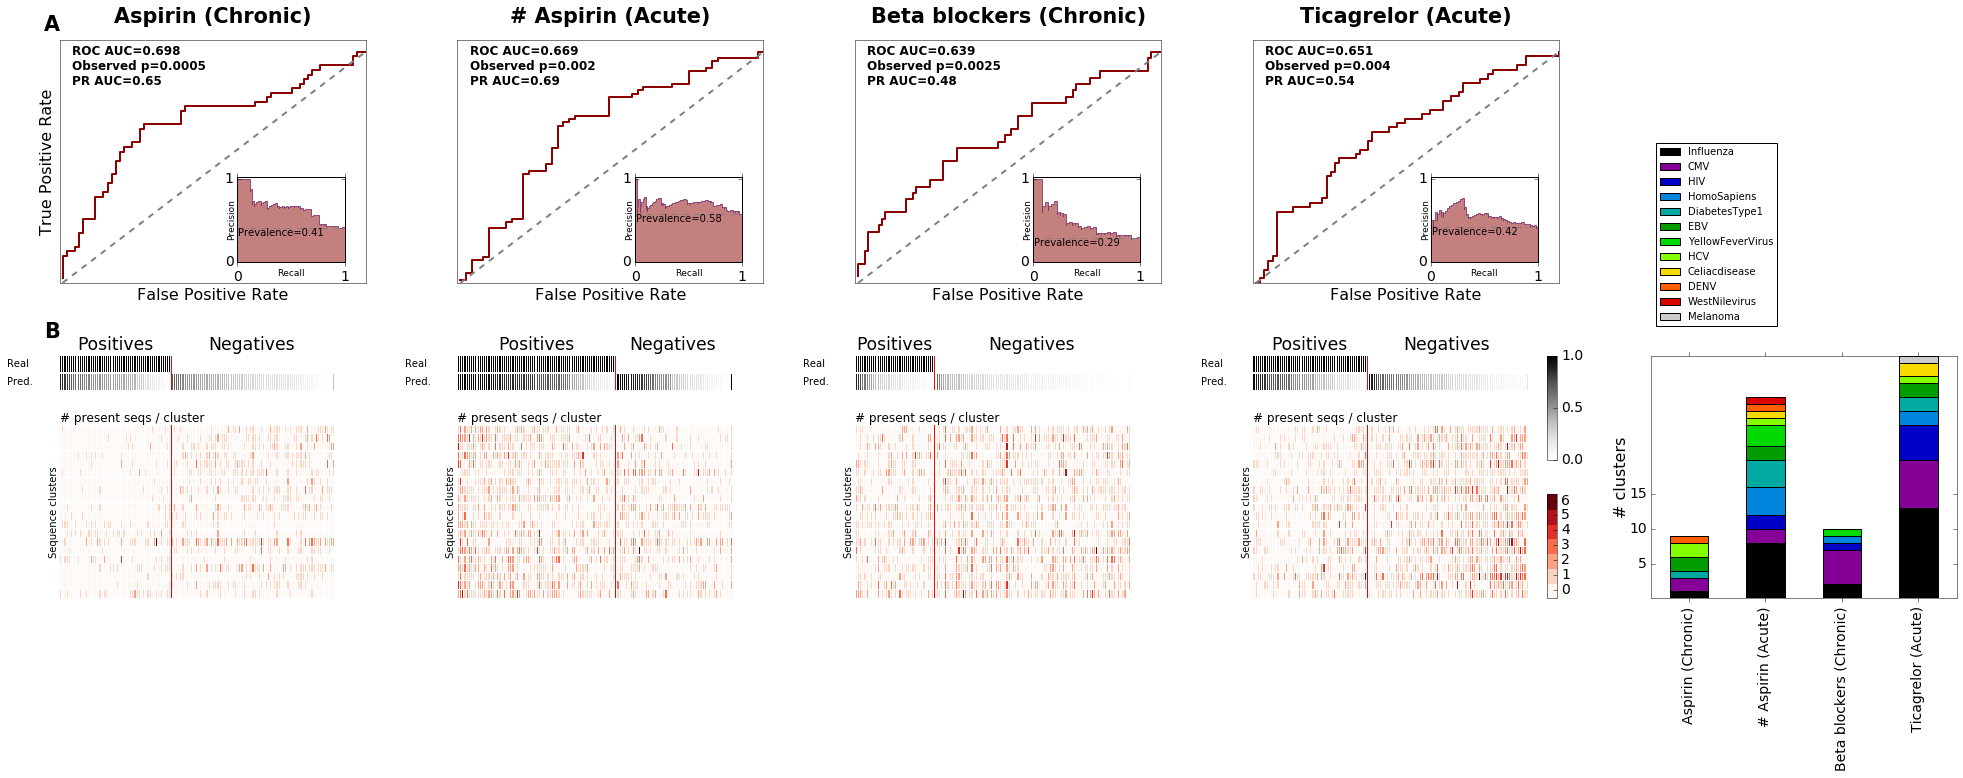

In [172]:
fig = plt.figure(figsize=(34, 10))
gs0 = gridspec.GridSpec(2, 5, wspace=0.3, hspace=0.3)

#add sub-figure letters and remove spines:
ax = plt.gca()
plt.text(0,1.01,'A',ha='right',va='bottom',transform=ax.transAxes,fontsize='xx-large',fontweight='bold')
plt.text(0,0.46,'B',ha='right',va='bottom',transform=ax.transAxes,fontsize='xx-large',fontweight='bold')
remove_spines(removeFigBorders=True)

### A:
ax1 = plt.Subplot(fig, gs0[0, 0])
fig.add_subplot(ax1)

ax2 = plt.Subplot(fig, gs0[0, 1])
fig.add_subplot(ax2)

ax3 = plt.Subplot(fig, gs0[0, 2])
fig.add_subplot(ax3)

ax4 = plt.Subplot(fig, gs0[0, 3])
fig.add_subplot(ax4)

ax9 = plt.Subplot(fig, gs0[1, 4])
fig.add_subplot(ax9)

### B:
# ax5 = plt.Subplot(fig, gs0[1, 0])
# fig.add_subplot(ax5)
ax51,ax52,ax53,ax54=divide_to_subplots_fig5b(gs0[1, 0])

# ax6 = plt.Subplot(fig, gs0[1, 1])
# fig.add_subplot(ax6)
ax61,ax62,ax63,ax64=divide_to_subplots_fig5b(gs0[1, 1])

# ax7 = plt.Subplot(fig, gs0[1, 2])
# fig.add_subplot(ax7)
ax71,ax72,ax73,ax74=divide_to_subplots_fig5b(gs0[1, 2])


# ax8 = plt.Subplot(fig, gs0[1, 3])
# fig.add_subplot(ax8)
ax81,ax82,ax83,ax84=divide_to_subplots_fig5b(gs0[1, 3])


nTopFeatures=20
# fig,ax1,ax2,ax3,ax4,ax51,ax52,ax53,ax54,ax61,ax62,ax63,ax64,ax71,ax72,ax73,ax74,ax81,ax82,ax83,ax84,ax9=
plot_fig5(fig,nTopFeatures,ax1,ax2,ax3,ax4,ax51,ax52,ax53,ax54,ax61,ax62,ax63,ax64,ax71,ax72,ax73,ax74,ax81,ax82,ax83,ax84,ax9)
for ax in [ax1,ax2,ax3,ax4]:
    remove_spines(ax,removeTicklabels=True)
# for ax in [ax5,ax6,ax7,ax8]:
#      remove_spines(ax,removeTicklabels=False)
        
# fig.align_ylabels(axes=[ax_PCoA,ax_PCoA_dist])
# ax1.yaxis.set_label_coords(-0.15, 0.5)
# ax5.yaxis.set_label_coords(-0.15, 0.5)

fig.savefig(FIG5_DIR + 'figure5_%s_%s.png' %(nTopFeatures,cdate), dpi=300)

print 'Finished figure 5!!'



plt.show()

In [171]:
mpl.rcParams['ytick.labelsize']

14.0

#  copy all necessary functions to .py files! generate .py file for figure 5 and execute!!!!!

In [15]:
subplot_list=[('AdmissionAspirin','Aspirin (Chronic)',
                   'AdmissionAspirinBetaBlockersDischargeMerformin_XGB100_randomSearch_25_byNewX_AUC/'),
                 ('AcuteAspirin','# Aspirin (Acute)',
                  'Acute_medication_phenotypes_XGB50_randomSearch_25_bynewXonlySeqsCardio126040085noNans_optByAUC/'),
                 ('AdmissionBetaBlockers','Beta blockers (Chronic)',
                  'AdmissionAspirinBetaBlockersDischargeMerformin_XGB100_randomSearch_25_byNewX_AUC/'),
                 ('AcuteTicagrelor','Ticagrelor (Acute)',
                  'Acute_medication_phenotypes_XGB50_randomSearch_25_bynewXonlySeqsCardio126040085noNans_optByAUC/')
                 ]

                combined annotation_list_clean
CAAAAGNTGKLIF                              CMV
CAAAASGGSYIPTF                             EBV
CAAADDKIIF                    YellowFeverVirus
CAAADEEIGNQPQHF                            HCV
CAAAGGNNKLTF                               CMV
0 AdmissionAspirin
       cluster_head
0   CASSLGGGNQETQYF
1      CASSSTVDTQYF
2  CASSPGLAGAQETQYF
3    CASSLSTSGYEQYF
4     CASSETGLYGYTF
5     CASSSERTDTQYF
6   CASSTGQGISYEQYF
7    CASSRDRRNTEAFF
8     CASSHGQAYGYTF
9    CASSQTGGQETQYF
getting seqID info
getting info for each cluster...
0
1
2
3
4
5
6
7
8
9
{u'DiabetesType1': 1, u'EBV': 1, u'HCV': 1, u'DENV': 1, u'CMV': 1}
               AdmissionAspirin
DiabetesType1                 1
EBV                           1
HCV                           1
DENV                          1
CMV                           1
1 AcuteAspirin
      cluster_head
0    CASSFGSTYEQYF
1  CASSLTRSSYNEQFF
2    CASSLRGYYEQYF
3     CASSLVGNEQYF
4  CASSPQSSGANVLTF
5    CASSLVLGETQYF


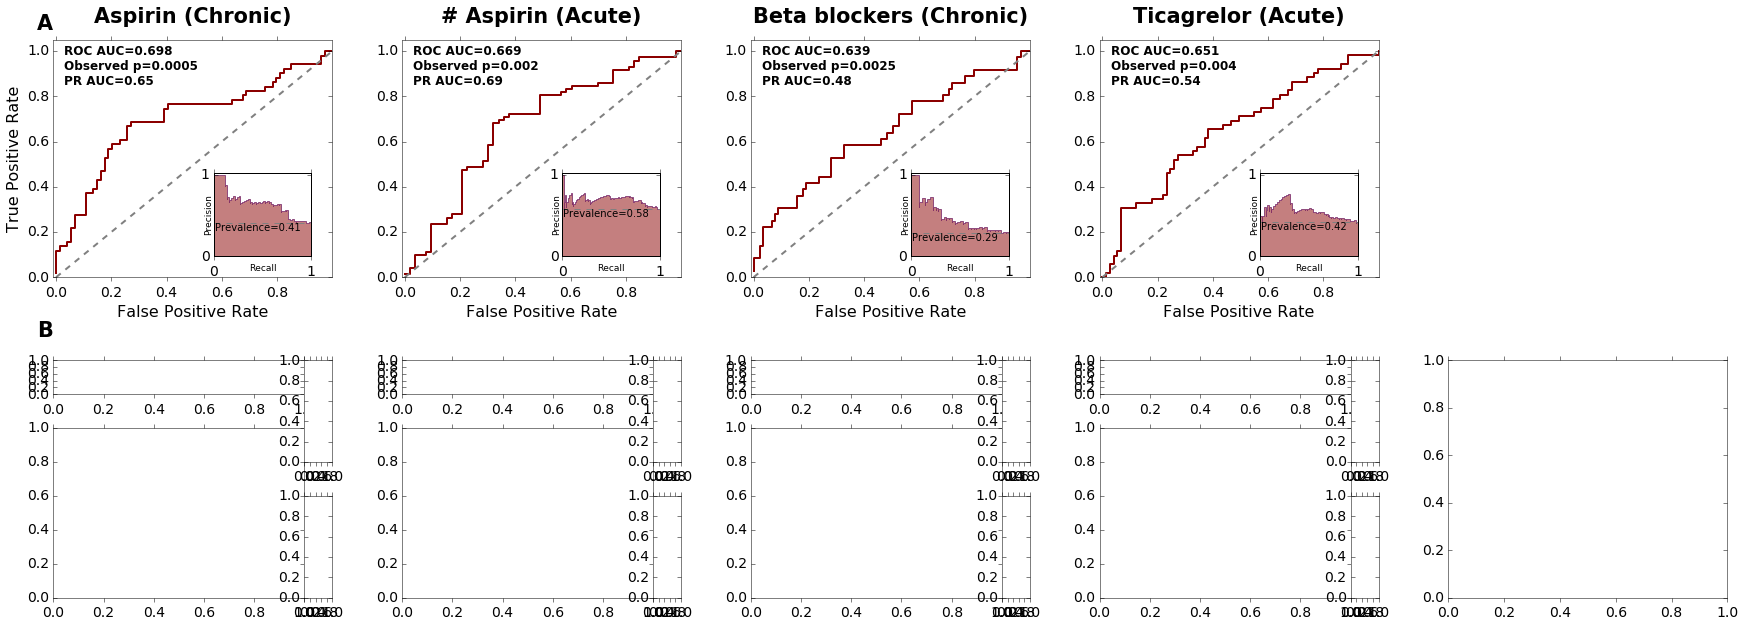

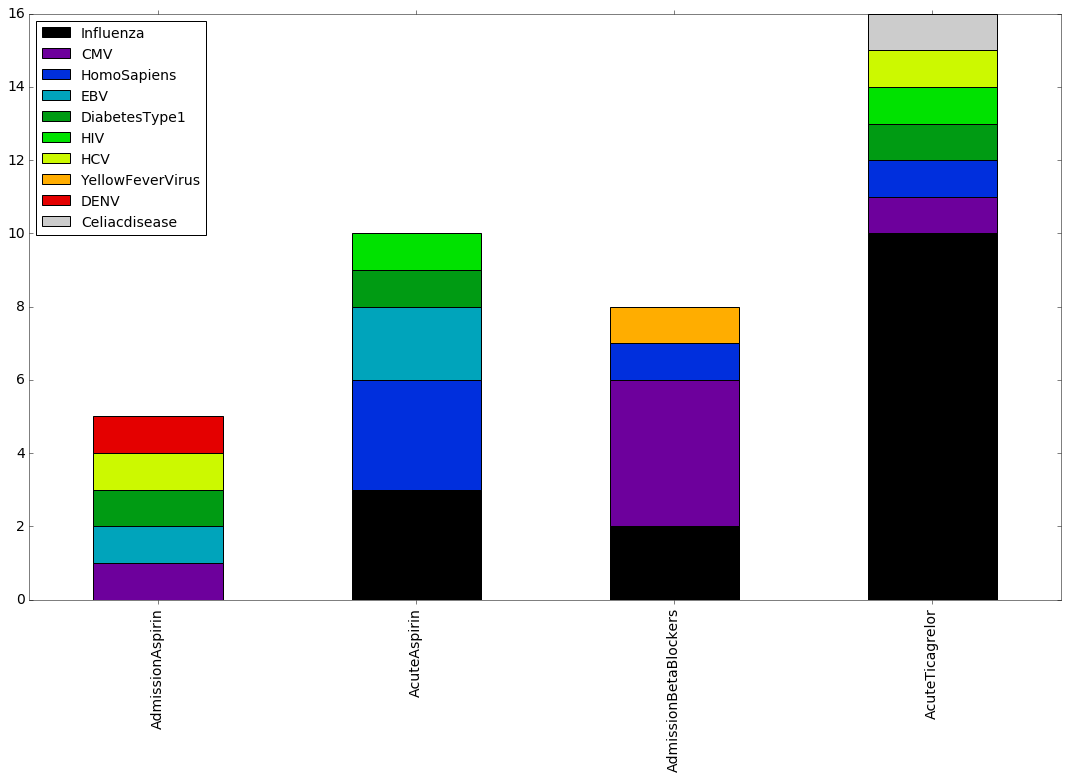

In [62]:
phenList=['Admission Aspirin','Acute Aspirin','AdmissionBetaBlockers','Acute Ticagrelor']
PRED_RESULTS_DIR='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/predictions2/'
nTopFeatures=10
output_dir='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/seqClusters_allProd_maxdist1/'
identities=pd.read_excel('%s/TCR CDR3 sequence databases/combined annotation_list_clean_popped.xlsx' %MyPath)
print identities.head()

top_list={}
summaryDF=pd.DataFrame()

for n,item in enumerate(subplot_list):
 
        phen=item[0]
        phen_niceName=item[1]
        pred_dir=item[2]
        ###get top 10 clusters:
        print n,phen

        #get top 10 shap values:
        dir2 = PRED_RESULTS_DIR + 'Cardio126_diseasePhenotypes/' + pred_dir
        try:
            shap_df = pd.read_pickle(dir2 + 'shap_values.pkl')[phen]
        except:
            try:
                shap_df = pd.read_pickle(dir2 + 'shap_values.pkl')[phen.replace(' ','')]
            except:
                shap_df = pd.read_pickle(dir2 + 'shap_values.pkl')[phen.replace('Acute','Acute ')]

        topN_features = shap_df.abs().sum().sort_values(ascending=False)[:nTopFeatures].index.tolist()  
        
        df2,phen_related_identities=get_annot_for_seqs_in_cluster(df=None,cluster_head_col=None,output_dir=output_dir,getIdentities=True,cluster_head_list=topN_features)
#         print topN_features
        df2.to_excel(FIG5_DIR+phen+'_top%s_shapvalues_clusters_withIdnetities.xlsx' %nTopFeatures)
        print phen_related_identities
    
        df3=pd.DataFrame(index=phen_related_identities.keys(),columns=[phen],data=phen_related_identities.values())
        print df3
        summaryDF=pd.merge(summaryDF,df3,how='outer',left_index=True,right_index=True)
summaryDF=summaryDF.fillna(0)
summaryDF_norm=summaryDF / summaryDF.sum()
print summaryDF_norm.sum()

summaryDF=summaryDF.loc[(summaryDF.sum(axis=1).sort_values(ascending=False)).index,:]
fig,ax=plt.subplots()
summaryDF.T.plot(kind='bar',stacked=True, figsize=(18.5, 10.5),cmap='nipy_spectral',ax=ax)
plt.show()
fig.savefig(FIG5_DIR+'annotations_top%s_shapvalues_clusters.png' %nTopFeatures)


In [55]:
summaryDF_norm.sum(axis=1).sort_values(ascending=False)

CMV                 0.991188
Influenza           0.958402
EBV                 0.348331
HIV                 0.311823
DiabetesType1       0.306185
HomoSapiens         0.295074
HCV                 0.285276
YellowFeverVirus    0.203448
DENV                0.145594
Celiacdisease       0.091626
WestNilevirus       0.034483
Melanoma            0.028571
dtype: float64

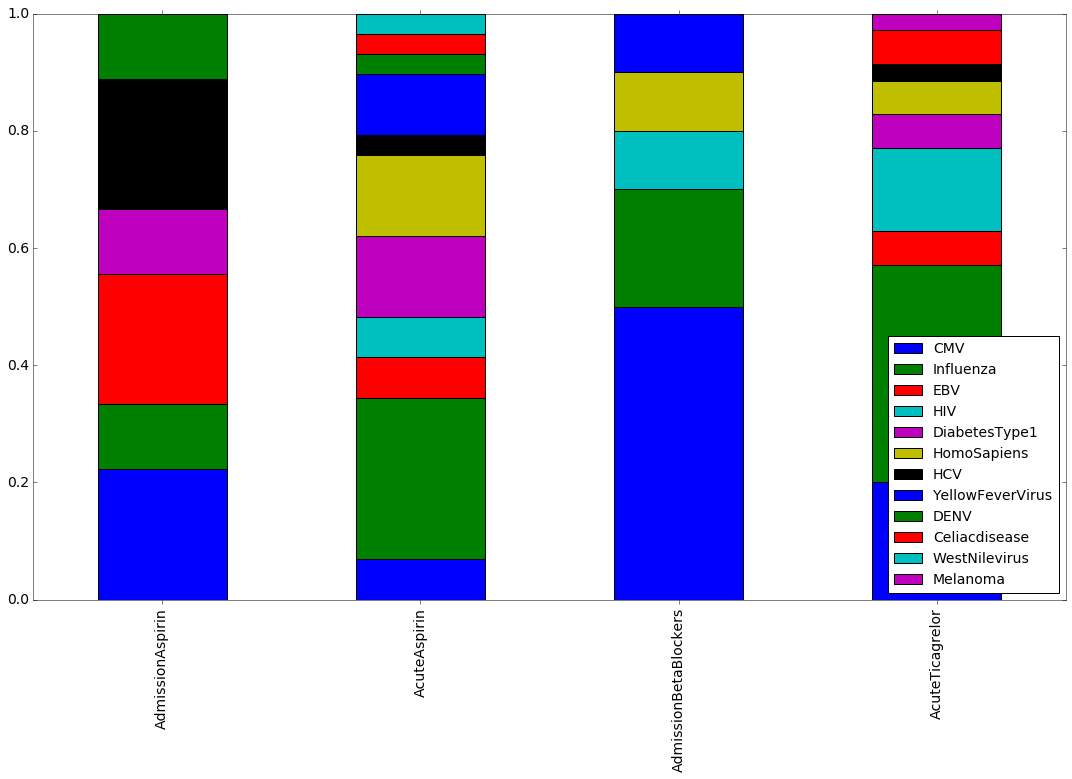

In [56]:
summaryDF_norm=summaryDF_norm.loc[(summaryDF_norm.sum(axis=1).sort_values(ascending=False)).index,:]
summaryDF_norm.T.plot(kind='bar',stacked=True, figsize=(18.5, 10.5))
plt.show()

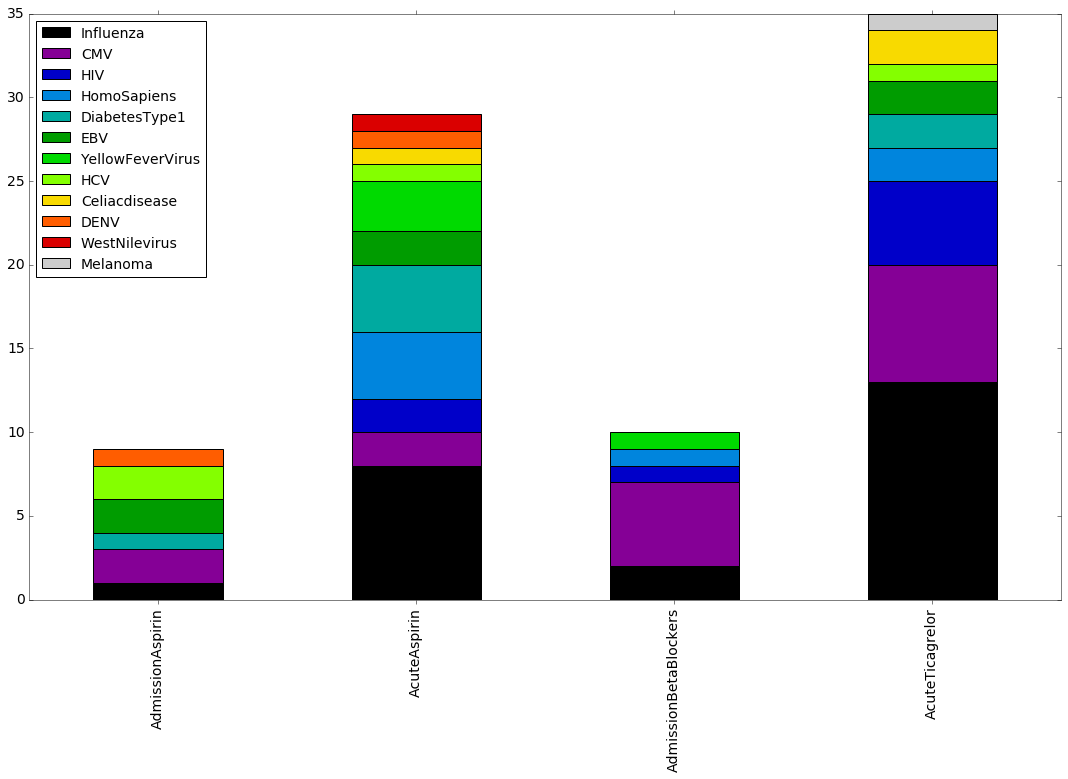

In [44]:
summaryDF.T

,Influenza,CMV,HomoSapiens,EBV,DiabetesType1,HIV,HCV,YellowFeverVirus,DENV,Celiacdisease
AdmissionAspirin,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
AcuteAspirin,3.0,0.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
AdmissionBetaBlockers,2.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AcuteTicagrelor,10.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


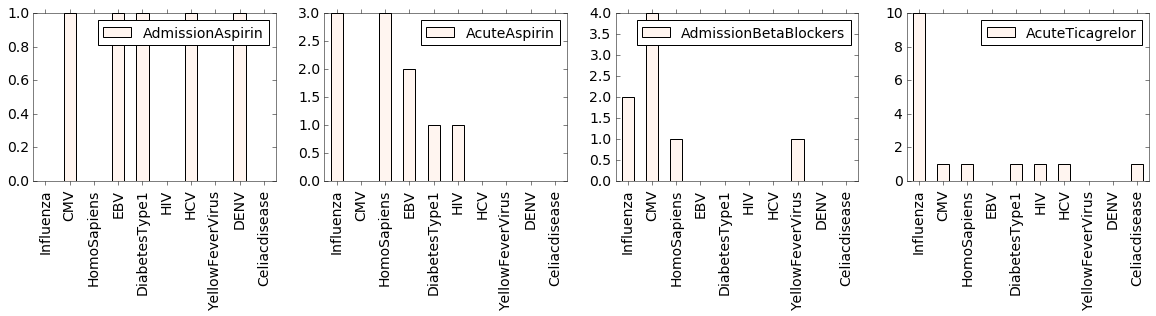

In [47]:
fig,axes=plt.subplots(nrows=1,ncols=4,figsize=(20,3))

for n,item in enumerate(subplot_list):
    phen=item[0]
    pd.DataFrame(summaryDF.T.loc[phen,:]).plot(kind='bar',stacked=True, cmap='Reds',ax=axes[n])

        
plt.show()

In [ ]:
for i in top_list.keys():
    for j in top_list.keys():
        if i!=j:
            print i,j
            print  set(top_list[i]).intersection(set(top_list[j]))

In [ ]:
Z:\Microbiome\Analyses\ShaniBAF\sharingAnalysis\seqClusters_allProd_maxdist1

the function get_annot_for_seqs_in_cluster was copied to sequenceClusterModule

In [ ]:
def gen_string_from_dict(dict1):
    a=''  
    for k,v in dict1.items():
        i=':'.join([str(k),str(v)])
        a=','.join([a,i])
        
    return a

def get_annot_for_seqs_in_cluster(df,cluster_head_col,output_dir,
                        getIdentities=True,cluster_head_list=None,identity_file=None,sumIdentities=True):
   
    from scipy.stats import chi2_contingency
    from collections import Counter
    
    if df is None:
        df=pd.DataFrame({'cluster_head':cluster_head_list})
        cluster_head_col='cluster_head'
        print df
        
    if identity_file is None:
        identity_file='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR CDR3 sequence databases/combined annotation_list_clean_popped.xlsx'
    CDR3_identity=pd.read_excel(identity_file)
    df2=df.copy()
    levDistMatTotalFile=output_dir+'levDistMatTotal.dat'
    levDistMatTotal=pd.read_pickle(levDistMatTotalFile)
    
    #get seqID matrix:
    print ('getting seqID info')
    for f in listdir(output_dir):
        if 'seqID' in f: seq_ID_file=f
    f3=output_dir+seq_ID_file
    seqID=pd.read_pickle(f3)
        
    #get sequences in cluster and their identities:
    print ('getting info for each cluster...')
    phen_related_identities={};
       
    for row in df.index:
        print (row)
        cluster_head=df.loc[row,cluster_head_col]
        
       
        #get seqID for cluster head:
        try:
            head_ID=list(np.where(seqID == cluster_head)[0])[0]
        except: 
            print ('this row is repeated more than once?')
            head_ID=list(np.where(seqID == cluster_head.tolist()[0])[0])[0]
        #get IDs for all sequences in the cluster:
        cluster_seq_IDs=levDistMatTotal[levDistMatTotal['seq1id']==head_ID]['seq2id'].tolist()

        #get sequences for all sequences in the cluster:
        cluster_seq_sequences=[seqID.loc[x] for x in cluster_seq_IDs]

    #   if get identities:
        df2.loc[row,'n sequences in cluster']=len(cluster_seq_sequences)+1
        df2.loc[row,'cluster sequences']=','.join(cluster_seq_sequences)
        if getIdentities:
            cluster_seq_sequences.insert(0,cluster_head)
            annot_list=[]
            for seq in cluster_seq_sequences:
                try:
                    annot=CDR3_identity.loc[seq,'combined annotation_list_clean']
                    try:
                        print (annot.shape) #a way to detect whether a sequence has more than 1 annotation (then it will become a series here)
                        print ('sequence %s has more than 1 annotations' %seq)
                        print (annot)
                        for a1 in list(annot):
                            annot_list.append(a1)
                    except:
                        annot_list.append(annot)
                except:
                    annot_list.append(None)

            identities_count=Counter(annot_list)
            for k,v in identities_count.items():
                try:
                    phen_related_identities[k]=phen_related_identities[k]+v
                except:
                    phen_related_identities[k]=v
                       
            a=gen_string_from_dict(identities_count)
            df2.loc[row,'annotation summary']=a
            
    if sumIdentities:
        phen_related_identities={i:phen_related_identities[i] for i in phen_related_identities if i!=None}
        df2.loc['summary','annotation summary']=gen_string_from_dict(phen_related_identities)
                                 
    else:
        phen_related_identities=None
    return df2,phen_related_identities

In [50]:
df=None
cluster_head_col=None
output_dir='/net/mraid08/export/jafar/Microbiome/Analyses/ShaniBAF/sharingAnalysis/seqClusters_allProd_maxdist1/'
getIdentities=True
cluster_head_list=['CASSYGQGNYGYTF', 'CASSSRYEQYF']

df2,phen_related_identities=get_annot_for_seqs_in_cluster(df,cluster_head_col,output_dir,getIdentities,cluster_head_list)

     cluster_head
0  CASSYGQGNYGYTF
1     CASSSRYEQYF
getting seqID info
getting info for each cluster...
0
1


In [51]:
df2

,cluster_head,n sequences in cluster,cluster sequences,annotation summary
0,CASSYGQGNYGYTF,64.0,"CASSYSQGNYGYTF,CASSYGAGNYGYTF,CASSIGQGNYGYTF,C...",",CMV:1,None:63"
1,CASSSRYEQYF,47.0,"CASSSPYEQYF,CASSKRYEQYF,CASSSRQEQYF,CASGSRYEQY...",",Influenza:1,Plasmodiumberghei:1,None:45"
summary,NaN,NaN,NaN,",CMV:1,Influenza:1,Plasmodiumberghei:1"


In [ ]:
phen_related_identities

In [176]:
df=pd.DataFrame({'a':[1,10,100,100]})
df['-log10']=-np.log10(df.a)
df

,a,-log10
0,1,-0.0
1,10,-1.0
2,100,-2.0
3,100,-2.0


In [178]:
-np.log10(0.1)

1.0

In [179]:
-np.log10(0.026)

1.585026652029182